
# Teorema de Stokes e Teorema de Gauss


In [1]:
import time
print(' Última execución ', time.asctime() )

 Última execución  Tue Apr 22 15:42:53 2025



### Obxectivos

 Extensión do teorema de Green a 3D. Teorema de Stokes.

 Estender o teorema da diverxencia a 3D. Teorema de Gauss.

 Mostrar algúns exemplos sinxelos.


*Nota*

Para que este notebook funcione en colab, precisamos <a href = "https://www.dropbox.com/scl/fi/wwz2w43kqj0s38gm87roj/graph_utils.py?rlkey=rppkwu9tmbnnsojezzj69p1r0&dl=1"> graph_utils.py</a>. Podes descargalo premendo na ligazón, e subilo a colab:


<img src="https://www.dropbox.com/scl/fi/b35vcated0f9lwrw4jy01/colab_upload.jpg?rlkey=l1ag15r0ovkg2dsefze117k1y&raw=1" width=200 align="center" />

In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

figsize = 6, 3.8
cmap    = 'hot'


### Teorema de Stokes

####  Superficies orientables

 Unha superficie é orientable se ten dous lados, por exemplo, unha folla de papel.

 Fíxate na seguinte figura, é unha banda de Moebius e só ten un lado.

<img src="imgs/escher-moebius.jpg" width="300"/>


**Orientación á dereita**

 Damos a orientación dunha superficie mediante unha rotación á dereita. Xiraremos pola liña fronteiriza en sentido contrario ás agullas do reloxo, deixando sempre a superficie á nosa esquerda.

 *Observa* : a seguinte figura, a superficie e o seu bordo. O xiro da dereita seguiría a fronteira en sentido antihorario. Máis detalles poden verse <a href = "https://mathinsight.org/stokes_theorem_orientation"> aquí</a>.


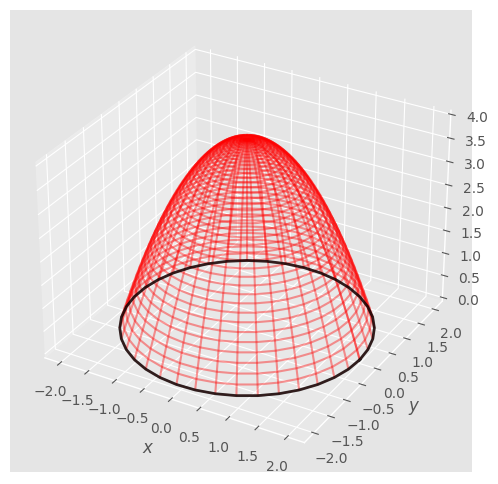

In [3]:
R = 2.
rrange, phirange = (0, R, 40), (0, 2*np.pi, 40)
sx = lambda r, phi : r * np.cos(phi)
sy = lambda r, phi : r * np.sin(phi)
sz = lambda r, phi : R*R - sx(r, phi)*sx(r, phi) - sy(r, phi)*sy(r, phi)
cx = lambda phi    : R * np.cos(phi) 
cy = lambda phi    : R * np.sin(phi)
cz = lambda phi    : 0. + 0. * phi
fig,ax = gf.wfsurface(sx, sy, sz, rrange, phirange, alpha = 0.4, color='red')
gf.line3d   (cx, cy, cz, phirange, newfig = [fig,ax], alpha = 0.4, color = 'black');


**O teorema de Stokes** é a xeneralización do teorema de Green a 3 dimensións.

 **Teorema** : Sexa unha superficie orientable $S$, que ten unha fronteira ${\bf c}(t)$ que podemos atravesar en sentido antihorario, e parametrizar con $\sigma(u, v)$, onde $(u , v) $ se definen nunha rexión $R$; e sexa un campo vectorial con primeiras derivadas continuas ${\bf F}(x, y, z) = \left( F_x, F_y, F_z \right)$, cúmprese:

$$
\int_{S} \nabla \times {\bf F} \, \mathrm{d} \vec{\sigma} = \oint_{\bf c} {\bf F} \, \mathrm{d}{\bf s}
$$




1) Consideremos primeiro un campo ${\bf F}(x, y, z) = \left( F_x (x, y, z), 0, 0\right)$ e unha superficie orientable $S$ con límite $ {\bf c}$ parametrizado con $\sigma(x, y, z(x, y) )$ nunha rexión $R$ de $(x, y)$ con fronteira ${\bf d}$.

 A integral ao longo do límite ${\bf c}$ en sentido contrario ás agullas do reloxo é

$$
\oint_{\bf c} {\bf F}(x, y, z) \, \mathrm{d}{\bf s} = \oint_{{\bf d}} F_x(x, y, z(x, y)) \, \mathrm{d}x
$$

onde podemos entender $F_x(x, y, z(x, y)) = f_x(x, y) $ como unha función composta que depende de $(x, y)$ directa e indirectamente a través de $z(x, y) ) $, e podemos reexpresar o último termo da igualdade cunha integral bidimensional.

$$
= \oint_{\bf d} f_x(x, y) \, \mathrm{d} x  
$$



E aplicando o teorema de Green:

 $$
 \oint_{\bf c} {\bf F}(x, y, z) \, \mathrm{d}{\bf s} = \int_{R} - \frac{\partial f_x}{\partial y} \mathrm{d}x \mathrm{d}y
 $$

 Aplicando a regra da cadea, obtemos:

 $$
 \frac{\partial f_x}{\partial y} = \frac{\partial F_x}{\partial y} + \frac{\partial F_x}{\partial z} \frac{\partial z}{\partial y}
 $$

 Por outra banda, sabemos que o vector ${\bf n}$ dunha superficie $\sigma(x, y) = (x, y, z(x, y))$ é:

 $$
 {\bf n} = \left( - \frac{\partial z}{\partial x}, - \frac{\partial z}{\partial y}, 1\right)
 $$


Despois podemos reescribir:

$$
 \frac{\partial f_x}{\partial y} = \frac{\partial F_x}{\partial y}  + \frac{\partial F_x}{\partial z} \frac{\partial z}{\partial y} 
=  \left( 0, - \frac{\partial F_x}{\partial z},  \frac{\partial F_x}{\partial y} \right) \left( - \frac{\partial z}{\partial x}, - \frac{\partial z}{\partial y}, 1 \right) 
$$

Isto é:

$$
 \oint_{\bf c} {\bf F}(x, y, z) \, \mathrm{d}{\bf s} = \int_{R} - \frac{\partial f_x}{\partial y} \mathrm{d}x \mathrm{d}y = \int_{R} - \left( \frac{\partial F_x}{\partial y} + \frac{\partial F_x}{\partial z} \frac{\partial z}{\partial y} \right) \, \mathrm{d}x \, \mathrm{d}y
$$

$$
= \int_{R}  \left( 0, \frac{\partial F_x}{\partial z}, - \frac{\partial F_x}{\partial y} \right) 
\left( - \frac{\partial z}{\partial x}, - \frac{\partial z}{\partial y}, 1 \right) \mathrm{d}x \mathrm{d}y 
= \int_{S} \left( 0, \frac{\partial F_x}{\partial z}, - \frac{\partial F_x}{\partial y}\right) \mathrm{d} \vec{\sigma}
$$


2) Se consideramos o vector ${\bf F}(x, y, z) = (0, F_y(x, y, z), 0)$ na mesma superficie obtemos:

 $$
 \oint_{c} {\bf F} \, \mathrm{d}{\bf s} = \int_S \left(- \frac{\partial F_y}{\partial z}, 0, \frac{\partial F_y }{\partial x} \right) \, \mathrm{d}\vec{\sigma}
 $$

 3) E finalmente con ${\bf F}(x, y, z) = (0, 0, F_z(x, y, z))$ coa parametrización de $S$ en $\sigma(x, y(x, z), z)$

 $$
 \oint_{c} {\bf F} \, \mathrm{d}{\bf s} = \int_S \left( \frac{\partial F_z}{\partial y}, - \frac{\partial F_z}{ \partial x} , 0 \right) \, \mathrm{d}\vec{\sigma}
 $$


E polo tanto, para ${\bf F}(x, y, z) = \left( F_x, F_y, F_z \right)$
    
$$
\nabla \times {\bf F}  
= \left| \begin{array}{ccc} {\bf i} & {\bf j} & {\bf k} \\
 \frac{\partial}{\partial x} &  \frac{\partial}{ \partial y} & \frac{\partial }{\partial z} \\
 F_x &  F_y & F_z\\
 \end{array} 
 \right| 
$$    

$$
\oint_{{\bf c}} {\bf F} \, \mathrm{d}{\bf s} = \int_{S}
\left(\frac{\partial F_z}{\partial y} - \frac{\partial F_y}{\partial z}, \,  \frac{\partial F_x}{\partial z} - \frac{\partial F_z}{\partial x}, \, \frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y}\right) \mathrm{d} \vec{\sigma}
$$
$$
= \int_S \nabla\times F \, \mathrm{d}\vec{\sigma}
$$

 co que se demostra o teorema de Stokes.


*Inciso*

Vexamos unha demostración aproximada do teorema (Green-Stokes).

 Considera a espira de tamaño diferencial, cos lados $\Delta x, \, \Delta y$ co vértice inferior en $(x_0, y_0)$. O campo ten derivadas parciais continuas, polo que admite a expansión de Taylor.

In [4]:
def espira():
    xrange = (-2., 2., 10)
    Ex = lambda x, y:  -y/2 + x/2 # -y/2 #+ x/2
    Ey = lambda x, y:   x/2 + y/2
    gf.quiver2d(Ex, Ey, xrange, xrange);
    x0, y0, xside, yside = -1, -1., 2., 2.
    gf.square( (x0, y0), xside, yside, color = 'r');
    gf.arrow ( x0 + 0.4 * xside, y0              ,  0.2 * xside,  0.0       , head = 0.1, color = 'r');
    gf.arrow ( x0 + xside      , y0 + 0.4 * yside,  0.0        ,  0.2* yside, head = 0.1, color = 'r');
    gf.arrow ( x0 + 0.6 * xside, y0 + 1.0 * yside, -0.2 * xside,  0.0       , head = 0.1, color = 'r');
    gf.arrow ( x0              , y0 + 0.6 * yside,  0.0        , -0.2* yside, head = 0.1, color = 'r');
    plt.gca().set_aspect('equal', 'box')

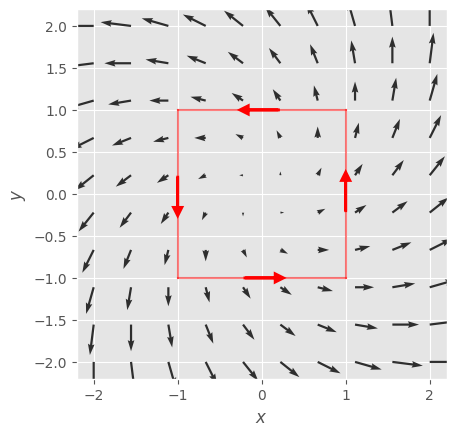

In [5]:
espira()

Considera a integral ao longo dos lados verticais na que só participa $F_y$. Ten en conta que o lado dereito entra cun (+) e o lado esquerdo cun (-) na circulación. Podemos aproximar a integral:

$$
F_y(x_0 + \Delta x, y_0) \, \Delta y - F_y(x_0, y_0) \, \Delta y \simeq \frac{\partial F_y}{\partial x}(x_0 ,y_0) \, \Delta x \Delta y
$$

 Considera agora a integral nos lados horizontais, un signo (-) aparece arriba cando se move á esquerda e un signo (+) aparece debaixo.

$$
- F_x(x_0, y_0 + \Delta y) \, \Delta x + F_x(x_0, y_0) \, \Delta x \simeq - \frac{\partial F_x}{\partial y}(x_0 ,y_0) \, \Delta y \Delta x
$$

Polo tanto, a integral ao longo da espira infinitesimal é:

$$
\left( \frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} \right) \, \mathrm{d}x \mathrm{d}y
$$




**Exercicio** : Verifica o teorema de Stokes na superficie dada pola intersección dun cilindro infinito cun eixe na dirección $z$ e base $x^2 + y^2 = 1$, e o plano $x+y+z = 1 $, con ${\bf F}(x, y, z) = (-y^3, x^3, z^3)$


In [6]:
phirange, zrange = (0., 2*np.pi, 30), (-1, 3, 30)
s1x = lambda z, phi : 1 * np.cos(phi)
s1y = lambda z, phi : 1 * np.sin(phi)
s1z = lambda z, phi : z + 0.*phi
rrange = (0., 1., 20)
s2x = lambda r, phi : r * np.cos(phi)
s2y = lambda r, phi : r * np.sin(phi)
s2z = lambda r, phi : 1 - s2x(r, phi) - s2y(r, phi)
cx = lambda phi    : 1 * np.cos(phi) 
cy = lambda phi    : 1 * np.sin(phi)
cz = lambda phi    : 1 - cx(phi) - cy(phi)
#Campo
Fx = lambda x, y, z : -y**3 
Fy = lambda x, y, z :  x**3 
Fz = lambda x, y, z :  z**3 
#Rotacional
Rx = lambda x, y, z :  0 
Ry = lambda x, y, z :  0
Rz = lambda x, y, z :  3*x*x + 3*y*y


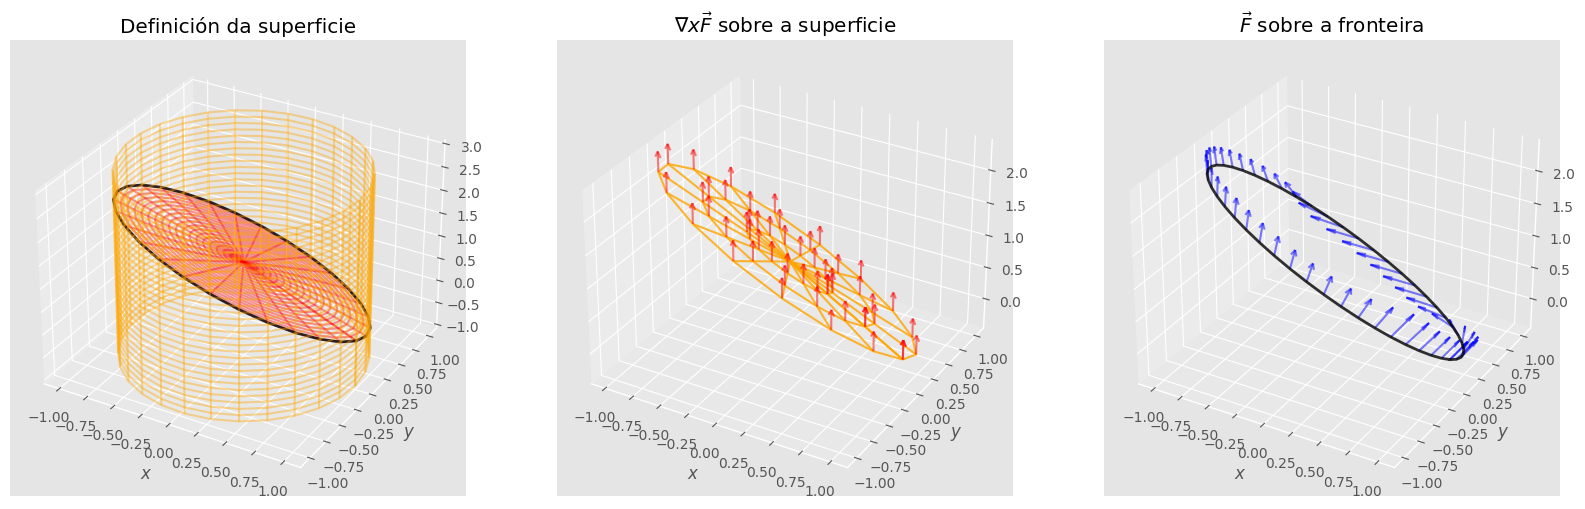

In [7]:
## figura
fig = plt.figure(figsize=(20, 12))
ax1 = fig.add_subplot(1, 3, 1,projection="3d") # 
gf.wfsurface(s1x, s1y, s1z, zrange, phirange, newfig = [fig,ax1], alpha = 0.4, color='orange')
gf.wfsurface(s2x, s2y, s2z, rrange, phirange, newfig = [fig,ax1], alpha = 0.4, color = 'red');
gf.line3d   (cx, cy, cz, phirange, newfig = [fig,ax1], alpha = 0.4, color = 'black');
bla=ax1.set_title("Definición da superficie")
## integral de superficie
rrange, phirange = (0., 1, 4), (0, 2*np.pi, 18)
ax2 = fig.add_subplot(1, 3, 2,projection="3d")  # 
gf.quiver3d_in_wfsurface(Rx, Ry, Rz, s2x, s2y, s2z,  rrange, phirange, newfig = [fig,ax2], alpha = 0.5, color = 'red');
gf.wfsurface(s2x, s2y, s2z, rrange, phirange, newfig = [fig,ax2], alpha = 0.8, color = 'orange');
bla=ax2.set_title(r"$\nabla x \vec{F}$"+" sobre a superficie")
## integral de linha
rrange, phirange = (0., 1, 4), (0, 2*np.pi, 50)
ax3 = fig.add_subplot(1, 3, 3,projection="3d")  # 
gf.quiver3d_in_line3d(Fx, Fy, Fz, cx, cy, cz, phirange, newfig = [fig,ax3],alpha = 0.5, color = 'blue');
gf.line3d(cx, cy, cz, phirange, newfig = [fig,ax3], alpha = 0.8, color = 'black');
bla=ax3.set_title(r"$\vec{F}$ sobre a fronteira")


Lembremos que a superficie está baseada nun disco de raio unitario e a intersección co plano $x + y + z = 1$

 Podemos parametrizar a superficie:

 $$
 \sigma (x, y ) = (x, y, 1 - x -y), \;\;\; x^2 + y^2 \le 1
 $$

 onde:

 $$
 {\bf n}(x, y) = (1, 1, 1)
 $$

 E o borde coa curva:

 $$
 {\bf c}(\phi) = (\cos \phi, \sin \phi, 1 - \cos \phi - \sin \phi),\,\,\, \phi \in [0, 2 \pi )
 $$

 onde:

 $$
 \dot{{\bf c}}(\phi) = (-\sin \phi, \cos \phi, \sin \phi - \cos \phi)
 $$


O rotacional de ${\bf F} = (-y^3, x^3, z^3)$ é:

$$
\nabla \times {\bf F}  
= \left| \begin{array}{ccc} {\bf i} & {\bf j} & {\bf k} \\
 \frac{\partial}{\partial x} &  \frac{\partial}{ \partial y} & \frac{\partial }{\partial z} \\
 -y^3 &  x^3 & z^3\\
 \end{array} 
 \right| = \left(0, 0, 3 x^2 + 3 y^2\right) 
$$

 A integral na superficie:

$$
\int_{S} \nabla \times {\bf F} \, \mathrm{d}\vec{\sigma} = \int_{R} (0, 0, 3 x^2 + 3 y^2) \, (1, 1, 1) \, 
\mathrm{d}x\mathrm{d}y \\ = \int_R 3 (x^2 + y^2)\, \mathrm{d}x\mathrm{d}y 
$$

A rexión $R$ é o disco de raio unitario, que podemos integrar en polares

$$
\int_0^{2\pi} \int_0^1 3 r^2 \, r\mathrm{d}r \mathrm{d}\phi 
= \frac{3}{4} r^4 \Big|_0^1 2 \pi = \frac{3 \pi}{2}
$$

lembra que o xacobiano en polares é $r$.

A integral de ${\bf F}$ ao longo da fronteira:
    
$$
\oint_{{\bf c}}{\bf F} \, \mathrm{d}{\bf s} = 
\oint_{{\bf c}} - y^3 \mathrm{d}x + x^3 \mathrm{d}y  + z^3 \mathrm{d}z
$$

$$
= \int_0^{2\pi}\left(- \sin^3 \phi, \cos^3 \phi, (1 - \cos \phi - \sin \phi)^3  \right) \, \left( -\sin \phi, \cos \phi, \sin \phi - \cos \phi \right)  \mathrm{d}\phi
$$
$$
= \int_0^{2\pi} \left( \sin^4 \phi + \cos^4  \phi  + (1 - \cos \phi - \sin \phi)^3 (\sin \phi  - \cos \phi) \right) \, \mathrm{d}\phi
$$



 Que dividimos en dúas integrais:

$$
 \int_0^{2\pi} (\sin^4 \phi + \cos^4 \phi) \, \mathrm{d}\phi + \int_0^{2\pi} (1-\cos\phi-\sin\phi)^3 (\sin \phi -\cos \phi) \, \mathrm{d}\phi
$$




Na primeira integral, se operamos:

$$
\sin^4 \phi + \cos^4 \phi
= \frac{1}{4}\left( 1 - \cos 2 \phi \right)^2 + \frac{1}{4}\left(1 + \cos 2\phi \right)^2 
$$
$$
= \frac{1}{4} \left( 1 + \cos^2 2\phi - 2 \cos 2 \phi + 1 + \cos^2 2\phi + 2 \cos 2 \phi\right)
$$
$$
= \frac{1}{2} (1 + \cos^2 2 \phi) = \frac{1}{2} \left( 1 + \frac{1}{2} (1 + \cos 4 \phi ) \right)
$$

Entón:

$$
\int_0^{2\pi} \left(\frac{3}{4} + \frac{1}{4} \cos 4 \phi \right) \mathrm{d}\phi = \left( \frac{3 \phi}{4} + \frac{1}{16} \sin  4 \phi\right) \Big|_0^{2\pi}  =  \frac{3\pi}{2}
$$

A segunda integral calcúlase directamente:

$$ 
 \int_0^{2\pi} (1-\cos\phi-\sin\phi)^3 (\sin \phi -\cos \phi) \, \mathrm{d}\phi
= \frac{1}{4}\left( 1 - \cos \phi - \sin \phi \right)^4 \Big|_0^{2\pi} = 0
$$


**Exercicio** : Verifica o teorema de Stokes co campo ${\bf F}(x, y, z) = (-y, x, 0)$ na superficie $z = 4 - x^2 - y^2$ con $ z \ge 0$.


In [8]:
sx = lambda r, phi : r * np.cos(phi)
sy = lambda r, phi : r * np.sin(phi)
sz = lambda r, phi : 4 - sx(r, phi)*sx(r, phi) - sy(r, phi)*sy(r, phi)
cx = lambda phi    : 2. * np.cos(phi) 
cy = lambda phi    : 2. * np.sin(phi)
cz = lambda phi    : 0. + 0. * phi
rrange, phirange = (0, 2, 40), (0, 2*np.pi, 40)
#Campo
Fx = lambda x, y, z : -1.*y + 0.*x
Fy = lambda x, y, z :  1.*x + 0.*y
Fz = lambda x, y, z :  0. + 0.*z
#Rotacional
Rx = lambda x, y, z :  0.*x
Ry = lambda x, y, z :  0.*y
Rz = lambda x, y, z :  2. + 0.*z


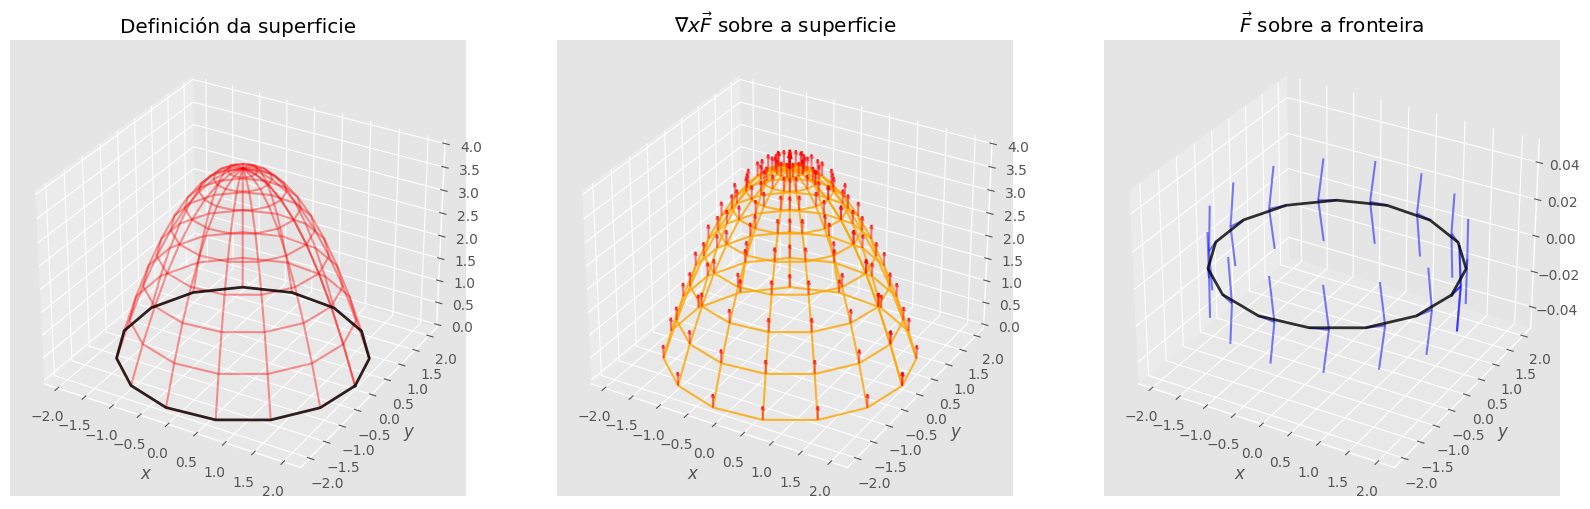

In [9]:
## superficie
fig = plt.figure(figsize=(20, 12))
ax1 = fig.add_subplot(1, 3, 1,projection="3d") # 
rrange, phirange = (0., 2, 10), (0, 2*np.pi, 16)
gf.wfsurface(sx, sy, sz, rrange, phirange, newfig = [fig,ax1],alpha = 0.4, color='red')
gf.line3d   (cx, cy, cz, phirange, newfig = [fig,ax1], alpha = 0.4, color = 'black');
bla=ax1.set_title("Definición da superficie")
## integral de superficie
ax2 = fig.add_subplot(1, 3, 2,projection="3d") # 
gf.quiver3d_in_wfsurface(Rx, Ry, Rz, sx, sy, sz, rrange, phirange, newfig = [fig,ax2],alpha = 0.5, color = 'red');
gf.wfsurface(sx, sy, sz, rrange, phirange, newfig = [fig,ax2], alpha = 0.8, color = 'orange');
bla=ax2.set_title(r"$\nabla x \vec{F}$"+" sobre a superficie")
# integral de linha
ax3 = fig.add_subplot(1, 3, 3,projection="3d") # 
gf.line3d(cx, cy, cz, phirange, newfig = [fig,ax3], alpha = 0.2, color = 'black');
gf.quiver3d_in_line3d(Fx, Fy, Fz, cx, cy, cz, phirange,newfig = [fig,ax3], alpha = 0.5, color = 'blue');
bla=ax3.set_title(r"$\vec{F}$ sobre a fronteira")

Parametrizamos a superficie como unha gráfica:

$$
\sigma(x, y) = \left( x, y, 4 - x^2 - y^2\right)
$$

$$
{\bf n}(x, y) = (2x, 2y, 1)
$$

Parametrizamos a fronteira, que é a circunferencia de raio 2:

$$
{\bf c}(\phi) = (2 \cos \phi, 2 \sin \phi, 0)
$$

$$
\dot{{\bf c}} (\phi) = (-2 \sin \phi, 2 \cos \phi, 0)
$$

O rotacional:

$$
\nabla \times {\bf F}  
= \left| \begin{array}{ccc} {\bf i} & {\bf j} & {\bf k} \\
 \frac{\partial}{\partial x} &  \frac{\partial}{ \partial y} & \frac{\partial }{\partial z} \\
 -y &  x & 0\\
 \end{array} 
 \right| = \left(0, 0, 2\right) 
$$

A integral do rotacional na superficie:

$$
\int_S \nabla \times {\bf F} \, \mathrm{d} \vec{\sigma} = \int_R (0, 0, 2) \, (2x, 2y, 1) \, \mathrm{d}x\mathrm{d}y
= \int_R 2 \, \mathrm{d}x\mathrm{d}y
$$

A rexión $R$ é o disco de raio 2, se cambiamos a polares

$$
= \int_0^2 \int_0^{2\pi} 2 \, r \mathrm{d} r\mathrm{d}\phi = 2 \pi r^2 \Big|_0^2 = 8 \pi
$$

E a integral do campo ao longo da fronteira:

$$
\oint_{\bf c} {\bf F} \, \mathrm{d}{\bf s} = \oint -y \, \mathrm{d}x + x \, \mathrm{d}y
$$

$$
\int_0^{2\pi} (-2 \sin \phi, 2 \cos \phi, 0 ) \, (-2 \sin \phi, 2 \cos \phi, 0) \, \mathrm{d}\phi
$$
$$
= \int_0^{2\pi} 4 \, (\sin^2 \phi + \cos^2 \phi) \, \mathrm{d}\phi = \int_0^{2\pi}4 \, \mathrm{d}\phi = 8 \pi
$$


### Teorema de Strogradski-Gauss

 O teorema de Gauss correspóndese coa extensión do teorema da diverxencia a 3 dimensións.

 **Teorema** : Sexa un volume regular $V$, limitado por unha superficie pechada $S$, e sexa un campo vectorial con primeiras derivadas continuas ${\bf F}(x, y, z) = \left( F_x, F_y , F_z \right)$, temos:

 $$
 \oint_{S} {\bf F} \, \mathrm{d}\vec{\sigma} = \int_V \nabla \cdot {\bf F} \, \mathrm{d}x\mathrm{d}y \mathrm{d}x
 $$

 onde a superficie pechada está definida cara fóra.



*Cando falabamos de integrais de superficie, dicíamos*: a seguinte figura, onde se representa a gráfica da función $f(x, y) = x^2 + y^2$, e se debuxa unha partición da rexión $(x, y)$. Para cada un dos rectángulos da gráfica, que é unha pequena sección dun plano, damos a súa área como:

$$
\mathrm{d} \sigma =
\sqrt{1 + \left(\frac{\partial z}{\partial x}\right)^2 + \left(\frac{\partial z}{\partial y} \right)^2} \, \mathrm{d}x \mathrm{d}y
$$

 Mentres que a área dos rectángulos en $(x, y) $ que os soportan é
 $
 \mathrm{d}x\mathrm{d}y
 $

 Podemos reescribir:

$$
\mathrm{d}x \mathrm{d}y = \mathrm{d}\sigma \; {\cos \gamma}, \;\;
\cos \gamma = \frac{1}{\sqrt{1 + \left(\frac{\partial z}{\partial x}\right)^2 + \left(\frac{\partial z}{\partial y} \right)^2}}
$$

 Onde $\gamma$ é agora o ángulo que forma a normal, ${\bf n}$, co eixo $z$, $\cos \gamma = \hat{k} \hat{n}$.

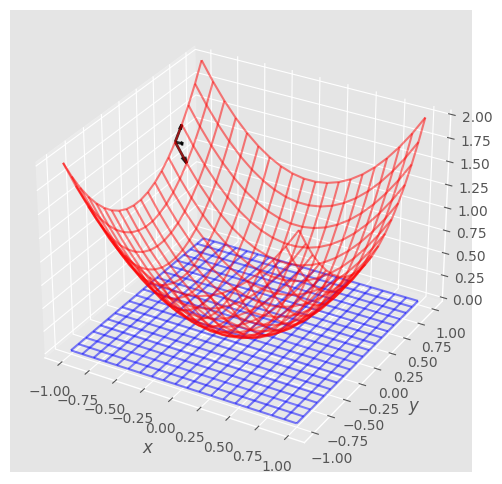

In [10]:
xrange = (-1., 1., 20)
xfun = lambda x, y : x
yfun = lambda x, y : y
zfun = lambda x, y : x*x + y*y
zero = lambda x, y : 0*x + 0*y
fig,ax = gf.wfsurface(xfun, yfun, zfun, xrange, xrange, alpha = 0.5);
gf.wfaxis   (xfun, yfun, zfun, xrange, xrange, ax, 0, 15)
gf.wfsurface(xfun, yfun, zero, xrange, xrange, newfig = [fig,ax], alpha = 0.5, color = 'b');


Sexa un volume regular definido por unha rexión $D$ en $(x, y)$ e $z_1(x, y) \le z \le z_2(x, y)$, onde $z_1(x,y), \, z_2(x,y)$ son dúas funcións escalares que nos limitan os valores de $z$.

Consideremos:

$$
\int_V \frac{\partial F_z}{\partial z} \, \mathrm{d}x\mathrm{d}y\mathrm{d}z 
= \int_D F_z(x, y, z) \Big|_{z_1}^{z_2} \, \mathrm{d}x\mathrm{d}y \\
= \int_D  \left[F_z(x, y, z_2(x,y)) - F_z(x, y, z_1(x,y) \right] \mathrm{d}x \mathrm{d}y
$$


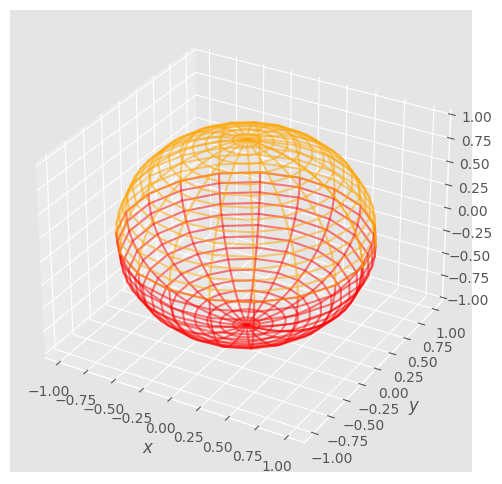

In [11]:
r, phirange              = 1, (0, 2*np.pi, 20)
theta1range, theta2range = (0, np.pi/2, 16), (np.pi/2, np.pi, 16)
Fx = lambda x, y, z :  x
Fy = lambda x, y, z :  y
Fz = lambda x, y, z :  z
sx = lambda theta, phi :  r * np.sin(theta) * np.cos(phi)
sy = lambda theta, phi :  r * np.sin(theta) * np.sin(phi)
sz = lambda theta, phi :  r * np.cos(theta) 
fig,ax = gf.wfsurface(sx, sy, sz, theta1range, phirange, alpha = 0.5, color = 'orange');
gf.wfsurface(sx, sy, sz, theta2range, phirange, newfig = [fig,ax], alpha = 0.5, color = 'red');


A integral

$$
\int_D F_z\left(x, y, z_2(x, y)\right) \, \mathrm{d}x\mathrm{d}y 
= \int_{D} F_z  \cos \gamma \mathrm{d}\sigma
= \int_{z_2} F_z \hat{k} \, \mathrm{d}\vec{\sigma} - \int_{z_1} F_z \hat{k} \, \mathrm{d}\vec{\sigma}
$$

Onde $\cos \gamma~\mathrm{d}\sigma = \hat{k} \cdot \hat{n}~\mathrm{d}\sigma = \hat{k} \cdot \mathrm{d}\vec{\sigma}$.

Lembramos que $\hat{n}$ é o vector unitario normal á diferencial de superficie da superficie dada por $z_2$, e $\gamma$ é o ángulo que $\hat{n}$ forma con $\hat{k}$ . Este termo é de $1$ para $z_2$ e é de $-1$ para $z_1$ xa que definimos a superficie cara fóra.

Entón:

$$
\int_V \frac{\partial F_z}{\partial z} \, \mathrm{d}x\mathrm{d}y\mathrm{d}z 
= \int_{S} F_z \hat{k} \, \mathrm{d}\vec{\sigma} 
$$

 E de xeito similar para o resto de termos, considerando para cada caso a correspondente definición das superficies que limitan o volume.

$$
\int_V \frac{\partial F_y}{\partial y} \, \mathrm{d}x\mathrm{d}y\mathrm{d}z 
= \int_{S} F_y \hat{j} \, \mathrm{d}\vec{\sigma} 
$$

$$
\int_V \frac{\partial F_x}{\partial x} \, \mathrm{d}x\mathrm{d}y\mathrm{d}z 
= \int_{S} F_x \hat{i} \, \mathrm{d}\vec{\sigma} 
$$

 Co que fica demostrado o teorema de Gauss.


*Observa* o seguinte cubo construído con cubos. Se fosen infinitesimais, a integral do fluxo nas súas caras sería a mesma que a diverxencia no centro do cubiño multiplicada polo seu volume diferencial.

 Se os cubos son adxacentes, o cálculo do seu fluxo anúlase nas paredes que se tocan, e a suma dos fluxos en todos os cubos é igual á das caras da superficie límite. Aínda que esa cantidade será igual á suma da diverxencia en cada cubo multiplicada polo seu volume!

<img src="imgs/cubes_gauss.jpeg" width="250"/>


**Exemplo** : Verifica o teorema de Gauss co campo ${\bf F}(x, y, z) = (x, y, z)$ na esfera de raio unitario.

 *Observa* : Como o campo é radial, o mesmo que os elementos diferenciais da área da esfera.


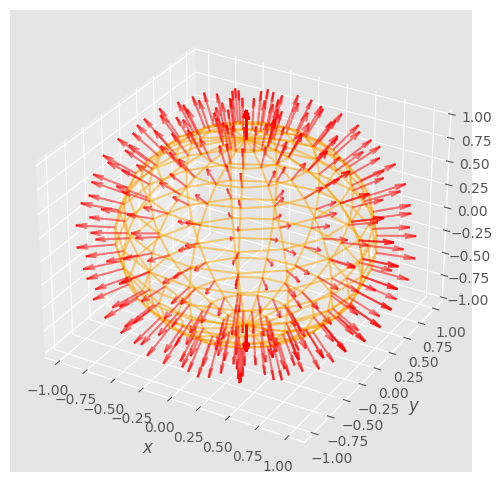

In [12]:
r, thetarange, phirange = 1, (0., np.pi, 18), (0, 2*np.pi, 18)
Fx = lambda x, y, z :  x
Fy = lambda x, y, z :  y
Fz = lambda x, y, z :  z
sx = lambda theta, phi :  r * np.sin(theta) * np.cos(phi)
sy = lambda theta, phi :  r * np.sin(theta) * np.sin(phi)
sz = lambda theta, phi :  r * np.cos(theta) 
fig,ax = gf.quiver3d_in_wfsurface(Fx, Fy, Fz, sx, sy, sz, thetarange, phirange, alpha = 0.5, color = 'red');
gf.wfsurface(sx, sy, sz, thetarange, phirange, newfig = [fig,ax], alpha = 0.5, color = 'orange');

a) a diverxencia
$\nabla \, {\bf F} = 3$

$$
\int_V 3 \, \mathrm{d}x \mathrm{d}y \mathrm{d}z = 3 \frac{4 \pi}{3} = 4 \pi
$$

b) Se parametrizamos a esfera en coordenadas esféricas, xa vimos que

$$
{\bf n}(\theta, \phi) = \left(\sin \theta \cos \phi,  \sin \theta \sin \phi, \cos \theta \right) \, \sin \theta
$$

$$
{\bf F} (\theta, \phi) = \left(\sin \theta \cos \phi, \sin \theta \sin \phi, \cos \theta \right)
$$

Logo:

$$
{\bf F} \, {\bf n} = \sin \theta
$$

 Entón:

$$
\oint_{S} {\bf F} \, \mathrm{d}\vec{\sigma} = \int_0^\pi \int_0^{2\pi} \sin \theta \, \mathrm{d}\theta \mathrm{d}\phi = \phi \Big|_0^{2\pi} (-\cos \theta) \Big|_0^{\pi} = 4 \pi
$$


**Exercicio** : Calcula o fluxo do campo ${\bf F}(x, y, z) = (2x, y^2, z^2)$ na esfera de raio unitario.



Aplicamos o teorema de Gauss,

 $$
 \nabla \, {\bf F} = 2 + 2y + 2z
 $$

 A integral

 $$
 \int_V ( 2 + 2 y + 2z) \, \mathrm{d}x\mathrm{d}y\mathrm{d}z
 $$

 As dúas últimas integrais son nulas. Considera o primeira. Dividimos o volume en dous hemisferios $y \le0$ e $y \ge 0$, a integral é a mesma en cada hemisferio pero cun signo cambiado.

 $$
 \int_V 2y \, \mathrm{d}x\mathrm{d}y\mathrm{d}z = \int_V 2z \, \mathrm{d}x\mathrm{d}y\mathrm{d}z = 0
 $$

 A integral restante é simplemente o dobre do volume da esfera:

 $$
 \int_V 2 \, \mathrm{d}x\mathrm{d}y\mathrm{d}z = 2 \frac{4 \pi}{3}
 $$



**Exercicio** : Calcula o fluxo do campo ${\bf F}(x, y, z) = (xy^2, yx^2, y)$ sobre o cilindro de disco unitario cortado polos planos $z=-1$ e $z=1$.



Aplicamos o teorema de Gauss:

 $$
 \nabla \, {\bf F} = y^2 + x^2
 $$

 Facemos a integral do volume en coordenadas cilíndricas, (lembra que o xacobiano é $r$):

 $$
 \int_V \nabla \, {\bf F} \, \mathrm{d}x \mathrm{d}y \mathrm{d}z
 = \int_{-1}^{1} \int_0^{2 \pi} \int_0^1 r^2\, r\mathrm{d}r \mathrm{d}\phi \mathrm{d}z
 $$

 Isto é:

 $$
 = z \Big|_{-1}^{+1} \phi \Big|_0^{2\pi} \frac{r^4}{4} \Big|_0^1 = \pi
 $$



#### Aínda hai máis!

 Carl Friedrich [Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) foi un dos grandes matemáticos da historia, con importantes contribucións en Física, Electromagnetismo e Estatística. A probabilidade normal, coa que ocorren case todos os fenómenos de medición, segue a lei de Gauss.

<img src="imgs/gauss.jpg" width="200"/>

